# 第5章：係り受け解析
data/ai.jaに含まれる日本語wikipediaの人工知能に関する記事のテキスト部分を抽出したものを利用してai.ja.txt.parsedに保存する

## 40.係り受け解析結果の読み込み(形態素)
形態素を表すクラスMorphを実装する

メンバ変数：
- 表層形 surface
- 基本形 base
- 品詞 pos
- 品詞細分類1 pos1

In [1]:
class Morph:
    def __init__(self, morph):
        surface, morphs = morph.split("\t")
        morph_list = morphs.split(",")
        self.surface = surface
        self.base = morph_list[6]
        self.pos = morph_list[0]
        self.pos1 = morph_list[1]

In [2]:
filepath = "./data/ai.ja/ai.ja.parsed.txt"

sentences = []
morphs = []
with open(filepath, "r") as f:
  for line in f:
    if line[0] == '*': #係り受けを示す行
      continue
    elif line != 'EOS\n': #文末
      morphs.append(Morph(line))
    else:
      if len(morphs) != 0:
        sentences.append(morphs)
        morphs = []

print(sentences)
for s in sentences:
  for m in s:
    print(vars(m)) #vars Objectのパラメータをdict形式で展開

[[<__main__.Morph object at 0x14e567d194e0>, <__main__.Morph object at 0x14e567d19518>], [<__main__.Morph object at 0x14e567d19588>, <__main__.Morph object at 0x14e567d19550>, <__main__.Morph object at 0x14e567d195c0>, <__main__.Morph object at 0x14e567d195f8>, <__main__.Morph object at 0x14e567d19630>, <__main__.Morph object at 0x14e567d19668>, <__main__.Morph object at 0x14e567d196a0>, <__main__.Morph object at 0x14e567d196d8>, <__main__.Morph object at 0x14e567d19710>, <__main__.Morph object at 0x14e567d197b8>, <__main__.Morph object at 0x14e567d197f0>, <__main__.Morph object at 0x14e567d19860>, <__main__.Morph object at 0x14e567d19898>, <__main__.Morph object at 0x14e567d198d0>, <__main__.Morph object at 0x14e567d19908>, <__main__.Morph object at 0x14e567d19940>, <__main__.Morph object at 0x14e567d19978>, <__main__.Morph object at 0x14e567d199b0>, <__main__.Morph object at 0x14e567d199e8>, <__main__.Morph object at 0x14e567d19a20>, <__main__.Morph object at 0x14e567d19a58>, <__main

## 41.係り受け解析結果の読み込み(文節・係り受け)
文節を表すChunkクラスを実装する

メンバ変数：
- 形態素(Morphオブジェクトのリスト) morphs
- 係り先文節インデックス番号 dst
- 係り元文節インデックス番号 srcs

In [3]:
class Chunk():
  def __init__(self, morphs, dst):
    self.morphs = morphs
    self.dst = dst
    self.srcs = []
    
class Sentence():
  def __init__(self, chunks):
    self.chunks = chunks
    for i, chunk in enumerate(self.chunks):
      if chunk.dst != -1 and isinstance(chunk.dst, int):
        self.chunks[chunk.dst].srcs.append(i)

In [4]:
filepath = "./data/ai.ja/ai.ja.parsed.txt"

sentences = []
chunks = []
morphs = []
with open(filepath, "r") as f:
  for line in f:
    if line[0] == '*':  #係受け情報の行
      if len(morphs) > 0:
        chunks.append(Chunk(morphs, dst))
        morphs = []
      dst = int(line.split(' ')[2].rstrip('D')) #係り受け先(Dの前の数字)を取得
    elif line != 'EOS\n':
      morphs.append(Morph(line))
    else:  # 文末
      chunks.append(Chunk(morphs, dst))
      sentences.append(Sentence(chunks))
      morphs = []
      chunks = []
      dst = None

# 確認
for chunk in sentences[2].chunks:
  print([morph.surface for morph in chunk.morphs], chunk.dst, chunk.srcs)

['人工', '知能'] 17 []
['（', 'じん', 'こうち', 'のう', '、', '、'] 17 []
['AI'] 3 []
['〈', 'エーアイ', '〉', '）', 'と', 'は', '、'] 17 [2]
['「', '『', '計算'] 5 []
['（', '）', '』', 'という'] 9 [4]
['概念', 'と'] 9 []
['『', 'コンピュータ'] 8 []
['（', '）', '』', 'という'] 9 [7]
['道具', 'を'] 10 [5, 6, 8]
['用い', 'て'] 12 [9]
['『', '知能', '』', 'を'] 12 []
['研究', 'する'] 13 [10, 11]
['計算', '機', '科学'] 14 [12]
['（', '）', 'の'] 15 [13]
['一', '分野', '」', 'を'] 16 [14]
['指す'] 17 [15]
['語', '。'] 34 [0, 1, 3, 16]
['「', '言語', 'の'] 20 []
['理解', 'や'] 20 []
['推論', '、'] 21 [18, 19]
['問題', '解決', 'など', 'の'] 22 [20]
['知的', '行動', 'を'] 24 [21]
['人間', 'に'] 24 []
['代わっ', 'て'] 26 [22, 23]
['コンピューター', 'に'] 26 []
['行わ', 'せる'] 27 [24, 25]
['技術', '」', '、', 'または', '、'] 34 [26]
['「', '計算', '機'] 29 []
['（', 'コンピュータ', '）', 'による'] 31 [28]
['知的', 'な'] 31 []
['情報処理', 'システム', 'の'] 33 [29, 30]
['設計', 'や'] 33 []
['実現', 'に関する'] 34 [31, 32]
['研究', '分野', '」', 'と', 'も'] 35 [17, 27, 33]
['さ', 'れる', '。'] -1 [34]


## 42.係り元と係り先の文節の表示
係り元と係り先の文節をタブ区切りで出力する

記号は出力しない

In [5]:
for chunk in sentences[2].chunks:
  if int(chunk.dst) != -1:
    src = ''.join([morph.surface if morph.pos != '記号' else '' for morph in chunk.morphs])
    dst = ''.join([morph.surface if morph.pos != '記号' else '' for morph in sentences[2].chunks[int(chunk.dst)].morphs])
    print(src, dst, sep="\t")

人工知能	語
じんこうちのう	語
AI	エーアイとは
エーアイとは	語
計算	という
という	道具を
概念と	道具を
コンピュータ	という
という	道具を
道具を	用いて
用いて	研究する
知能を	研究する
研究する	計算機科学
計算機科学	の
の	一分野を
一分野を	指す
指す	語
語	研究分野とも
言語の	推論
理解や	推論
推論	問題解決などの
問題解決などの	知的行動を
知的行動を	代わって
人間に	代わって
代わって	行わせる
コンピューターに	行わせる
行わせる	技術または
技術または	研究分野とも
計算機	コンピュータによる
コンピュータによる	情報処理システムの
知的な	情報処理システムの
情報処理システムの	実現に関する
設計や	実現に関する
実現に関する	研究分野とも
研究分野とも	される


## 43.名詞を含む文節が動詞を含む文節に係るものを抽出
名詞を含む文節が動詞を含む文節に係るとき、これをタブ区切りで表示する

記号は表示しない

In [6]:
sentence = sentences[2]
for chunk in sentence.chunks:
  src = ''.join([morph.surface if morph.pos != '記号' else '' for morph in chunk.morphs])
  src_pos = [morph.pos for morph in chunk.morphs]
  dst = ''.join([morph.surface if morph.pos != '記号' else '' for morph in sentence.chunks[int(chunk.dst)].morphs])
  dst_pos = [morph.pos for morph in sentence.chunks[int(chunk.dst)].morphs]
  if '名詞' in src_pos and '動詞' in dst_pos:
    print(src, dst, sep='\t')


道具を	用いて
知能を	研究する
一分野を	指す
知的行動を	代わって
人間に	代わって
コンピューターに	行わせる
研究分野とも	される


## 44.係り受け木の可視化
与えられた文の係り受け木を有向グラフとして表現する

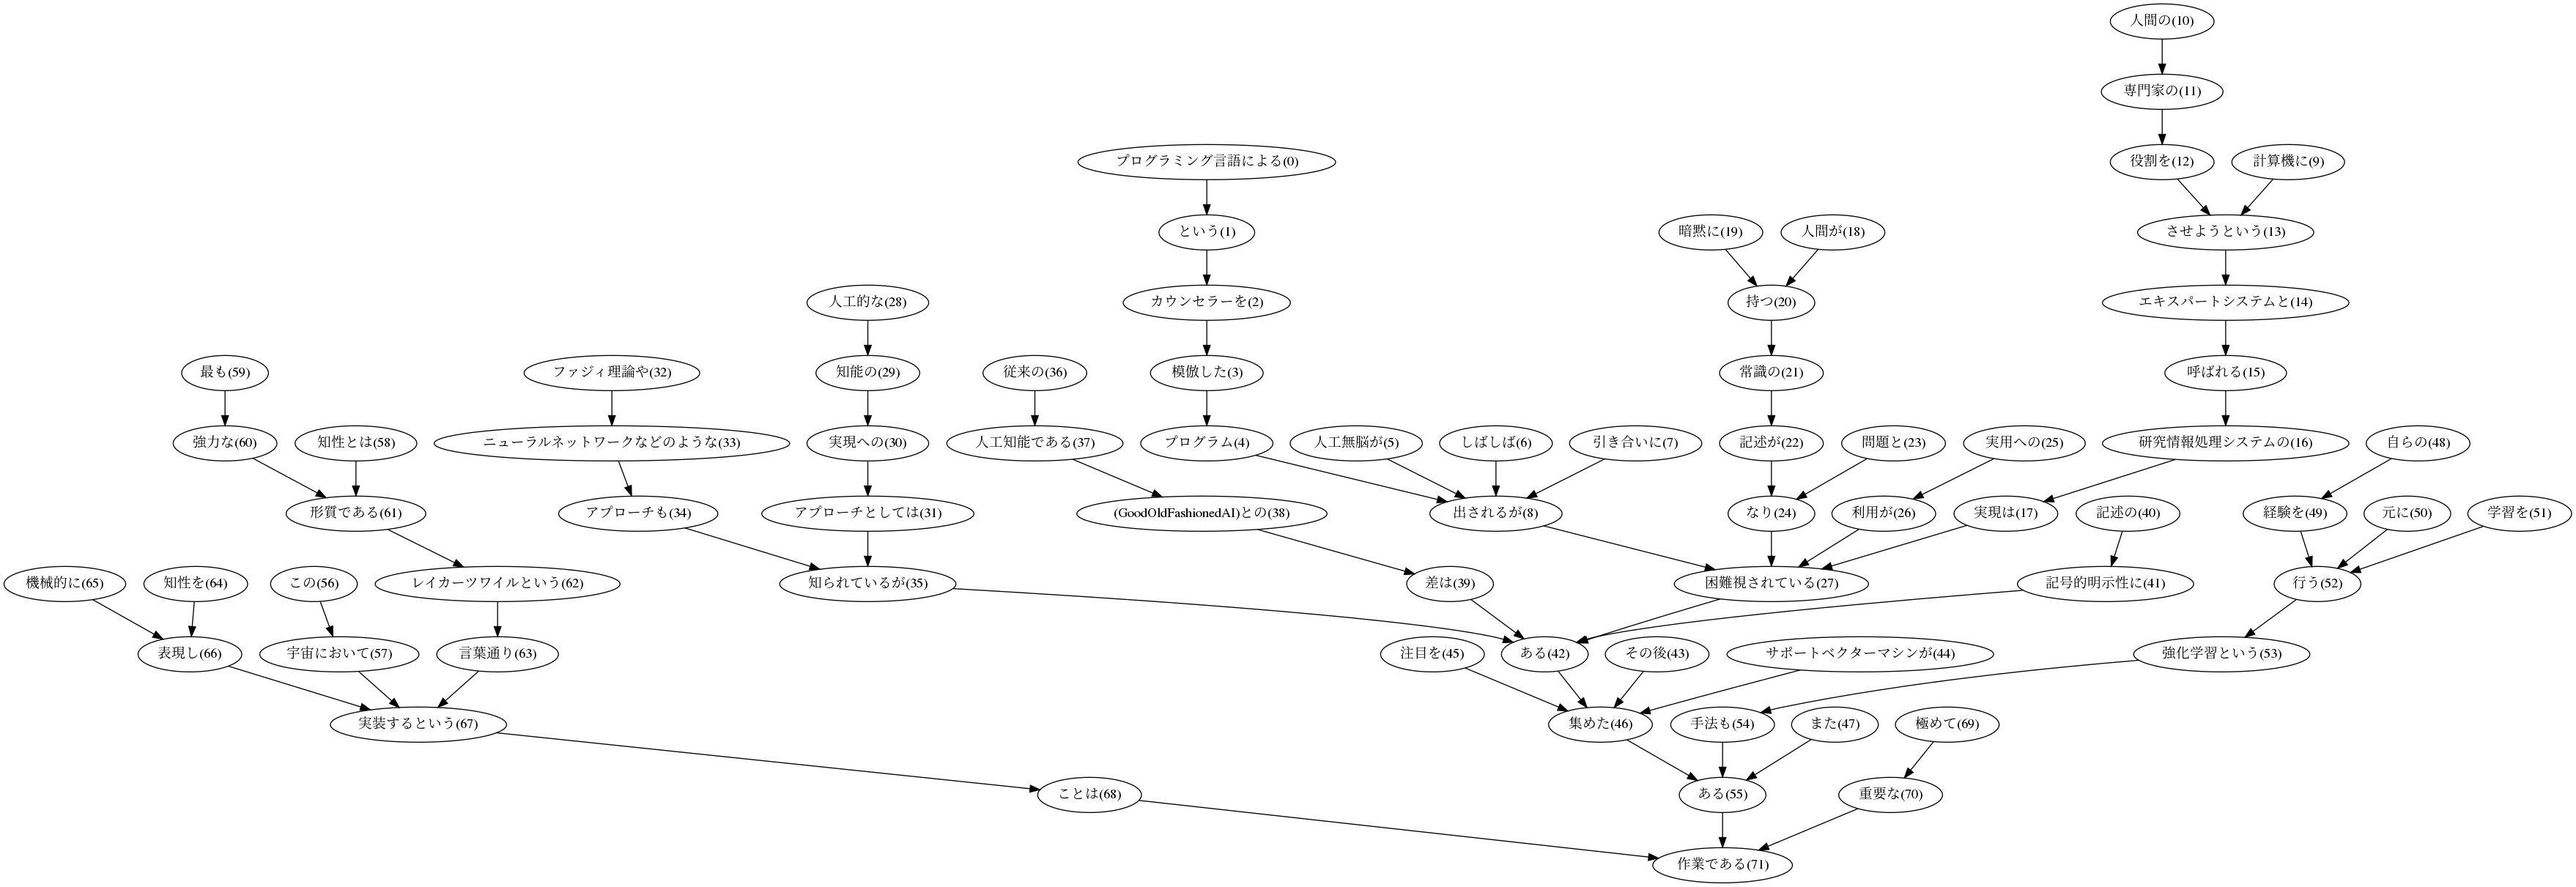

In [7]:
import pydot
from IPython.display import Image,display_png

output_path = "./data/morphgraph_output.png"

sentence = sentences[7]
edges = []
for id, chunk in enumerate(sentence.chunks):
  if int(chunk.dst) != -1:
    src = ''.join([morph.surface if morph.pos != '記号' else '' for morph in chunk.morphs] + ['(' + str(id) + ')'])
    dst = ''.join([morph.surface if morph.pos != '記号' else '' for morph in sentence.chunks[int(chunk.dst)].morphs] + ['(' + str(chunk.dst) + ')'])
    edges.append([src, dst])
g = pydot.graph_from_edges(edges, directed=True)
g.write_png(output_path)
display_png(Image(output_path))

## 45.動詞の格パターンの抽出
動詞を述語、動詞に係っている文節の助詞を格と考えて出力する

ただし
- 最左の動詞の基本形を述語とする
- コーパスで頻出の述語と格パターンのペアを頻度順に出力する

In [8]:
output_lines = []
for sentence in sentences:
    for chunk in sentence.chunks:
        for morph in chunk.morphs:
            if morph.pos == '動詞': #動詞があったとき、その文節(chunk)の係りもと文節(sentence.chunks[src])を列挙する
                kaku_surfaces = []
                for src in chunk.srcs:
                    kaku_surfaces += [morph.surface for morph in sentence.chunks[src].morphs if morph.pos == '助詞']
                if len(kaku_surfaces) > 0:
                    kaku_surfaces = sorted(list(set(kaku_surfaces))) #同じchunkに対しての格の被りを除去する
                    output_lines.append(f'{morph.base}\t{" ".join(kaku_surfaces)}')
                break
with open('./data/45_output.txt','w') as f:
    f.write('\n'.join(output_lines))


In [9]:
!cat ./data/45_output.txt | sort | uniq -c | sort -nr | head

     49 する	を
     19 する	が
     15 する	に
     15 する	と
     12 する	は を
     10 する	に を
      9 よる	に
      9 する	で を
      8 行う	を
      8 する	が に


In [10]:
!cat ./data/45_output.txt | grep '行う' | sort | uniq -c | sort -nr | head

      8 行う	を
      1 行う	まで を
      1 行う	は を をめぐって
      1 行う	は を
      1 行う	に を
      1 行う	に まで を
      1 行う	に により を
      1 行う	に
      1 行う	で を
      1 行う	で に を


In [11]:
!cat ./data/45_output.txt | grep 'なる' | sort | uniq -c | sort -nr | head

      3 なる	に は
      3 なる	が と
      2 なる	に
      2 なる	と
      1 無くなる	は
      1 異なる	も
      1 異なる	が で
      1 なる	も
      1 なる	は
      1 なる	に は も


In [12]:
!cat ./data/45_output.txt | grep '与える' | sort | uniq -c | sort -nr | head

      1 与える	に は を
      1 与える	が に
      1 与える	が など に


## 46.動詞の格フレーム情報の抽出
45の出力の後に述語が所属する文節そのものを出力するようにする

In [13]:
output_lines = []
for sentence in sentences:
    for chunk in sentence.chunks:
        for morph in chunk.morphs:
            if morph.pos == '動詞': # 動詞があったとき、その文節(chunk)の係りもと文節(sentence.chunks[src])を列挙する
                kaku_surfaces_list = []
                kaku_chunks = []
                for src in chunk.srcs:
                    kaku_surfaces = [morph.surface for morph in sentence.chunks[src].morphs if morph.pos == '助詞']
                    if len(kaku_surfaces) > 0:
                        # 助詞を含むchunkがあれば項を
                        kaku_surfaces_list += kaku_surfaces
                        kaku_chunks.append(''.join(morph.surface for morph in sentence.chunks[src].morphs if morph.pos != '記号'))
                if len(kaku_surfaces_list) > 0:
                    kaku_surfaces_list = sorted(list(set(kaku_surfaces_list))) #同じchunkに対しての格の被りを除去する
                    output_lines.append(f'{morph.base}\t{" ".join(kaku_surfaces_list)}\t{" ".join(kaku_chunks)}')
                break
with open('./data/46_output.txt','w') as f:
    f.write('\n'.join(output_lines))

In [14]:
!cat ./data/46_output.txt | head

用いる	を	道具を
する	て を	用いて 知能を
指す	を	一分野を
代わる	に を	知的行動を 人間に
行う	て に	代わって コンピューターに
する	と も	研究分野とも
述べる	で に の は	解説で 佐藤理史は 次のように
する	で を	知的能力を コンピュータ上で
する	を	推論判断を
する	を	画像データを


## 47.機能動詞構文のマイニング
動詞のヲ格にサ変接続名詞が入っている場合のみに着目したい

In [15]:
output_lines = []
for sentence in sentences:
    for chunk in sentence.chunks:
        for morph in chunk.morphs:
            if morph.pos == '動詞': # 動詞があったとき、その文節(chunk)の係りもと文節(sentence.chunks[src])を列挙する
                for i, src in enumerate(chunk.srcs):
                    if (len(sentence.chunks[src].morphs) == 2
                        and sentence.chunks[src].morphs[0].pos1 == 'サ変接続'
                        and sentence.chunks[src].morphs[1].surface == 'を'): #サ変 + を の組み合わせのchunkを判定する
                        predicate = ''.join([sentence.chunks[src].morphs[0].surface, sentence.chunks[src].morphs[1].surface, morph.base])
                        kaku_surfaces_list = []
                        kaku_chunks = []
                        for src_others in chunk.srcs[:i] + chunk.srcs[i + 1:]: #残りのchunkについて
                            kaku_surfaces = [morph.surface for morph in sentence.chunks[src_others].morphs if morph.pos == '助詞']
                            if len(kaku_surfaces) > 0:
                                kaku_surfaces_list += kaku_surfaces
                                kaku_chunks.append(''.join(morph.surface for morph in sentence.chunks[src_others].morphs if morph.pos != '記号'))
                        if len(kaku_surfaces_list) > 0:
                            cases = sorted(list(set(kaku_surfaces_list)))
                            output_lines.append(f'{predicate}\t{" ".join(kaku_surfaces_list)}\t{" ".join(kaku_chunks)}')
                        break
with open('./data/47_output.txt','w') as f:
    f.write('\n'.join(output_lines))

In [16]:
!cat ./data/47_output.txt | cut -f 1 | sort | uniq -c | sort -nr | head

      3 注目を集める
      2 研究をいる
      2 運転をする
      1 話をする
      1 話をいる
      1 命令をする
      1 反乱を起こす
      1 判断を介す
      1 特許をする
      1 特許をいる


In [17]:
!cat ./data/47_output.txt | cut -f 1,2 | sort | uniq -c | sort -nr | head

      1 話をする	は
      1 話をいる	は
      1 命令をする	で
      1 反乱を起こす	て に対して
      1 判断を介す	から
      1 特許をする	まで に が
      1 特許をいる	まで に が
      1 投資を行う	に で
      1 投資をする	は まで に
      1 追及を受ける	て で は とともに と で


## 48.名詞から根へのパスの抽出
文中のすべての名刺を含む文節に対し、その文節から構文木の根に至るパスを抽出する

In [18]:
for chunk in sentences[2].chunks:
    if '名詞' in [morph.pos for morph in chunk.morphs]: #chunkに名詞を含まれるか
        path = [''.join(morph.surface for morph in chunk.morphs if morph.pos != '記号')]
        while chunk.dst != -1: #根まで辿って出力
            path.append(''.join(morph.surface for morph in sentences[2].chunks[chunk.dst].morphs if morph.pos != '記号'))
            chunk = sentences[2].chunks[chunk.dst]
        print(' -> '.join(path))

人工知能 -> 語 -> 研究分野とも -> される
じんこうちのう -> 語 -> 研究分野とも -> される
AI -> エーアイとは -> 語 -> 研究分野とも -> される
エーアイとは -> 語 -> 研究分野とも -> される
計算 -> という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
概念と -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
コンピュータ -> という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
知能を -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
一分野を -> 指す -> 語 -> 研究分野とも -> される
語 -> 研究分野とも -> される
言語の -> 推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
理解や -> 推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
人間に -> 代わって -> 行わせる -> 技術または -> 研究

## 49.名詞間の係り受けパスの抽出
文中のすべての名詞句のペアを結ぶ最短係り受けパスを抽出せよ

名詞句ペア(i,j i < j)のとき
- iから構文木をたどって根に向かったときにjを通る場合、名詞ペア間のパスを->で連結する
- iとjそれぞれから構文木をたどって根に向かったときにあるノードkで接続される場合、iからk、jからkまでのパスを|で並列表記する

In [19]:
from itertools import combinations
import re

sentence = sentences[2]
nouns = [] #名詞を含む文節のidを格納
for i, chunk in enumerate(sentence.chunks):
    if '名詞' in [morph.pos for morph in chunk.morphs]:
        nouns.append(i)
for i, j in combinations(nouns, 2):  #ペアを作成
    path_i = []
    path_j = []
    while i != j:
        if i < j:
            path_i.append(i)
            i = sentence.chunks[i].dst
        else:
            path_j.append(j)
            j = sentence.chunks[j].dst
    if len(path_j) == 0:  #iから根のパス上にjがある場合
        chunk_X = ''.join([morph.surface if morph.pos != '名詞' else 'X' for morph in sentence.chunks[path_i[0]].morphs])
        chunk_Y = ''.join([morph.surface if morph.pos != '名詞' else 'Y' for morph in sentence.chunks[i].morphs])
        chunk_X = re.sub('X+', 'X', chunk_X)
        chunk_Y = re.sub('Y+', 'Y', chunk_Y)
        path_XtoY = [chunk_X] + [''.join(morph.surface for morph in sentence.chunks[n].morphs) for n in path_i[1:]] + [chunk_Y]
        print(' -> '.join(path_XtoY))
    else:  #あるノードkが共通の親の場合
        chunk_X = ''.join([morph.surface if morph.pos != '名詞' else 'X' for morph in sentence.chunks[path_i[0]].morphs])
        chunk_Y = ''.join([morph.surface if morph.pos != '名詞' else 'Y' for morph in sentence.chunks[path_j[0]].morphs])
        chunk_k = ''.join([morph.surface for morph in sentence.chunks[i].morphs])
        chunk_X = re.sub('X+', 'X', chunk_X)
        chunk_Y = re.sub('Y+', 'Y', chunk_Y)
        path_X = [chunk_X] + [''.join(morph.surface for morph in sentence.chunks[n].morphs) for n in path_i[1:]]
        path_Y = [chunk_Y] + [''.join(morph.surface for morph in sentence.chunks[n].morphs) for n in path_j[1:]]
        print(' | '.join([' -> '.join(path_X), ' -> '.join(path_Y), chunk_k]))


X | （Yのう、、 | 語。
X | Y -> 〈エーアイ〉）とは、 | 語。
X | 〈Y〉）とは、 | 語。
X | 「『Y -> （）』という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す | 語。
X | Yと -> 道具を -> 用いて -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す | 語。
X | 『Y -> （）』という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す | 語。
X | Yを -> 用いて -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す | 語。
X | 『Y』を -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す | 語。
X | Yする -> 計算機科学 -> （）の -> 一分野」を -> 指す | 語。
X | Y -> （）の -> 一分野」を -> 指す | 語。
X | Y」を -> 指す | 語。
X -> Y。
X -> 語。 | 「Yの -> 推論、 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術」、または、 | 研究分野」とも
X -> 語。 | Yや -> 推論、 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術」、または、 | 研究分野」とも
X -> 語。 | Y、 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術」、または、 | 研究分野」とも
X -> 語。 | Yなどの -> 知的行動を -> 代わって -> 行わせる -> 技術」、または、 | 研究分野」とも
X -> 語。 | Yを -> 代わって -> 行わせる -> 技術」、または、 | 研究分野」とも
X -> 語。 | Yに -> 代わって -> 行わせる -> 技術」、または、 | 研究分野」とも
X -> 語。 | Yに -> 行わせる -> 技術」、または、 | 研究分野」とも
X -> 語。 | Y」、または、 | 研究分野」とも
X -> 語。 | 「Y -> （コンピュータ）による -> 情報処理システムの -> 実現に関